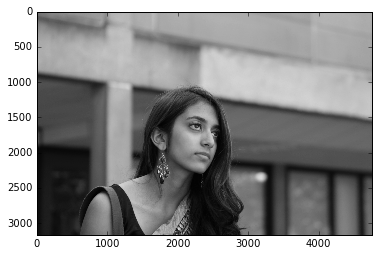

In [58]:

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# turn image to grayscale
img = mpimg.imread('/Users/parmita/exp/img2.png')  
x,y,z = img.shape

#bw = np.zeros(shape=(x,y,1))
bw = np.dot(img[...,:3], [0.299, 0.587, 0.114])
#bw = np.dot(img[...,:3], [0.3334, 0.3333, 0.3333])

plt.imshow(bw, cmap = plt.get_cmap('gray'))
plt.show()






[     0      0      0      0      2      2     47   1420  18413  27964
  28121  30404  34268  44485  54987  58889  64852  68660  72703  71562
  75819  78935  80554  94013 111937 110386  98722  86510  88864  87989
  87999  87211  89523  83809  65709  49106  45074  43750  42068  40842
  40996  40885  39607  38831  39375  38902  37680  37592  37574  36383
  37072  37781  37782  38592  38027  38157  37584  37707  37678  38506
  38858  39463  40091  39976  42714  44056  44815  46788  47812  49240
  54577  64219  73153  87719 102883 113185 129614 118485  86308  72909
  70618  81953 116450 135580 137823 135800 125412 100436  82939  77749
  75432  75197  75456  74485  70195  71364  72376  72529  73311  72303
  72868  78122  83542 102132 126826 125983 142597 155839 140946 148080
  90587  59598  57482  57049  58339  62000  68520  66089  65919  63893
  62844  67928  71636  67440  63862  59612  52487  48480  46466  44030
  42491  39147  37759  36645  36574  36609  37333  38733  38863  38860
  3875

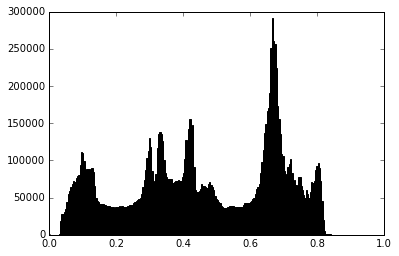

In [59]:
#create histogram for image
%matplotlib inline
a = bw.ravel()
total = len(a)
hist, bin_edges = np.histogram(a, 256, range=(0.0,1.0))
#print "histogram ",h
plt.hist(a, bins=256, range=(0.0, 1.0), fc='k', ec='k')
print hist
print total


In [51]:
#b = np.arange(256)
#c = b*hist
#sum(c)

bin_edges[115]


0.44921875

In [60]:
# use this histogram for median_ostu segmentation
#function level = otsu(histogramCounts, total)
#OTSU automatic thresholding method
#hist#grayscale histogram histCounts
#total#total number of pixels
sumB = 0;
wB = 0;
maximum = 0.0;
b = np.arange(256)
sum1 = sum(b*hist)
for ii in range(256):
    #start from the first bin in the histogram
    #adding pixels examined to wB - if wB ==zero, skip this iteration.
    wB = wB + hist[ii]
    if (wB == 0):
        continue
    #break out the loop when all of the pixels have been examined.   
    wF = total - wB
    if (wF == 0):
        break
    #multiply bin number with number of pixels in the bin
    # add it to the previous sum
    sumB = sumB +  (ii) * hist[ii]
    
    #divide the sum of intensities, weighted by their location
    # by number of pixels seen so far.
    mB = sumB / wB
    
    
    #get the residual weighted variance, by subtracting the 
    # pixel weights seen so far from total weighted sum, divided by
    #remaining pixels
    mF = (sum1 - sumB) / wF
    
    
    between = wB * wF * (mB - mF) * (mB - mF)
    #print "between", between
    if ( between >= maximum ):
        level = ii;
        maximum = between

print "level = ", level

level =  113


[ 0.49471766  0.49471766  0.49471766 ...,  0.46356079  0.46748235
  0.46748235]
[ 255.  255.  255. ...,  255.  255.  255.]
[[ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 ..., 
 [   0.    0.    0. ...,  255.  255.  255.]
 [   0.    0.    0. ...,  255.  255.  255.]
 [   0.    0.    0. ...,  255.  255.  255.]]


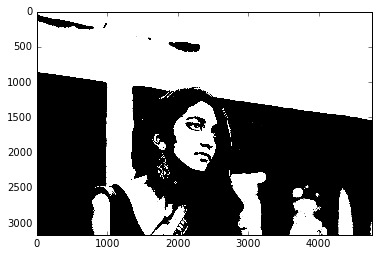

In [61]:

thresh = bin_edges[level]
print a
a[a < thresh] = 0    # Black
a[a >= thresh] = 255 # White
q = a.reshape(x,y)
print a
print q

plt.imshow(q, cmap = plt.get_cmap('gray'))
plt.show()
